# Logistic Regression

In [12]:
# import required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Import sample date
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/M_Signups/sample_data_classification.csv"
sample_data = pd.read_csv(data_path)
print(sample_data.shape)
sample_data.head()

(100, 4)


,output,input1,input2,input3
0,1,534,536,466
1,0,264,103,244
2,0,272,339,609
3,1,416,444,330
4,1,520,464,104


In [3]:
# Split data into input and putput objects
X = sample_data.drop(['output'], axis=1)
Y = sample_data['output']
print(X.shape)
X.head()

(100, 3)


,input1,input2,input3
0,534,536,466
1,264,103,244
2,272,339,609
3,416,444,330
4,520,464,104


In [4]:
print(Y.shape)
Y.head()

(100,)


0    1
1    0
2    0
3    1
4    1
Name: output, dtype: int64

In [5]:
# Split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=.2,
                                                    random_state=42,
                                                    stratify=Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train.head()

(80, 3)
(20, 3)
(80,)
(20,)


,input1,input2,input3
66,339,314,235
62,516,594,385
44,551,628,486
9,574,611,182
26,486,459,204


In [6]:
# instantiate our model object
clf = LogisticRegression(random_state=42) # default setttings

In [7]:
# train our model
clf.fit(x_train,y_train)
print(clf)

LogisticRegression(random_state=42)


In [8]:
# assess model accuracy, test how well it classifies our data 
y_pred = clf.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1]


In [9]:
accuracy_score(y_test,y_pred)

0.8

In [10]:
# we can ask for the probabilities instead
y_pred_prob = clf.predict_proba(x_test)
print(y_pred_prob)

[[0.18627185 0.81372815]
 [0.92633532 0.07366468]
 [0.69737524 0.30262476]
 [0.13673133 0.86326867]
 [0.94374026 0.05625974]
 [0.87816011 0.12183989]
 [0.79520663 0.20479337]
 [0.14399264 0.85600736]
 [0.40934432 0.59065568]
 [0.84344711 0.15655289]
 [0.76010891 0.23989109]
 [0.49981017 0.50018983]
 [0.00158532 0.99841468]
 [0.06184789 0.93815211]
 [0.90660303 0.09339697]
 [0.42642881 0.57357119]
 [0.10544574 0.89455426]
 [0.68770982 0.31229018]
 [0.34086887 0.65913113]
 [0.2221485  0.7778515 ]]


In [11]:
# confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[8 3]
 [1 8]]


C:\Users\eacalder\AppData\Local\Temp\1/ipykernel_20168/1951722288.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


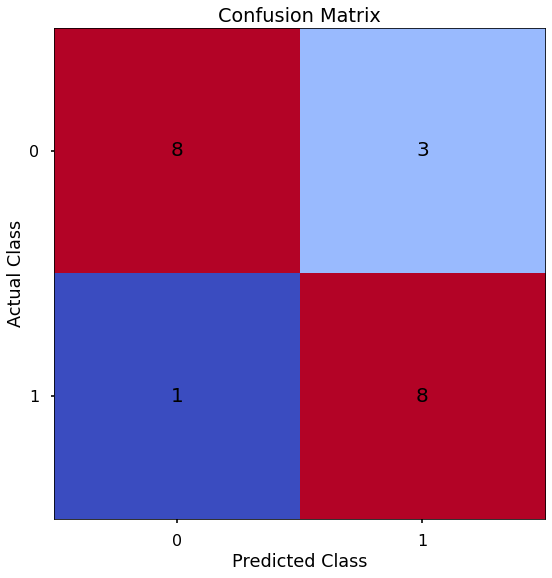

In [15]:
plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class") 
plt.xlabel("Predicted Class")
# dont hve to go through just understand and look up if need to
for (i, j), corr_value in np.ndenumerate (conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show() 